In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os, os.path
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
orig_scen = ["Low_RE_Cost","Mid_Case","High_RE_Cost","Low_Trans","High_Trans",
             "Electrification_EnhancedFlex","Electrification","High_NG_Price","High_Demand_Growth","Low_Everything",
             "Low_NG_Price","Low_Nuclear_CCS_Cost","PTC_ITC_Ext","Reduced_RE_Resource",
            "Mid_Case_Base_Flex","Low_Demand_Growth"]
scen = orig_scen.copy()
for os in orig_scen:
    new1 = os+"_95_by_2050"
    new2 = os+"_95_by_2035"
    scen += [new1]
    scen += [new2]
    
analysis = ["v6.2jedi_low","v6.2jedi_mid","v6.2jedi_high","v6.2nei_mid","v6.2nei_low","v6.2nei_high"]
f_cases = ["mid","lb","ub"]

analysis_name = analysis[0]

i = 0
for a in analysis:
    for c in f_cases:
        for s in scen:
            fpath = r"analysis/2_JEDI_to_demographics/output/Dist_female_StdScen21_"+s+"_annual_state_"+a+"_"+c+".csv"
            job_data = pd.read_csv(fpath)
            job_data["Scenario"] = s.replace("_"," ")
            job_data["f_case"] = c
            job_data["analysis"] = a

            if "jedi" in a:
                job_data["Nuclear"] = "JEDI"
            else:
                job_data["Nuclear"] = "NEI"
            
            if "2035" in s:
                job_data["ems_target"] = "95% by 2035"
            elif "2050" in s:
                job_data["ems_target"] = "95% by 2050"
            else:
                job_data["ems_target"] = "BAU"

            if i == 0:
                job_data_all = job_data.copy()
            else:
                job_data_all = job_data_all.append(job_data)
            i = i+1
job_data_all

,state,2022,2023,2024,2025,2026,2027,2028,2029,2030,...,EmpChange_5Y,EmpChange_10Y,20s,40s,EmpChange_dec,Scenario,f_case,analysis,Nuclear,ems_target
0,AL,30.074954,29.463588,28.934655,28.915809,28.897125,29.148881,29.418207,29.669781,29.921655,...,6.926625,7.510991,29.382740,32.333881,10.043792,Low RE Cost,mid,v6.2jedi_low,JEDI,BAU
1,AR,37.843214,37.984015,38.130595,38.149718,38.170374,38.125565,38.078543,38.064334,38.050045,...,-14.782734,-12.009587,38.066267,33.298400,-12.525177,Low RE Cost,mid,v6.2jedi_low,JEDI,BAU
2,AZ,37.255628,30.888199,29.630830,26.819786,29.757125,36.972863,35.556995,35.515511,35.265439,...,-14.228584,-10.441208,33.073597,33.365690,0.883160,Low RE Cost,mid,v6.2jedi_low,JEDI,BAU
3,CA,34.392510,30.581649,31.196578,31.203593,31.198457,34.232633,34.126807,34.035523,33.946726,...,-4.826768,-8.366818,32.768275,31.514951,-3.824808,Low RE Cost,mid,v6.2jedi_low,JEDI,BAU
4,CO,29.395942,29.545098,20.700797,26.115531,25.556888,31.656928,28.699570,30.685392,30.778545,...,17.311313,17.587492,28.126077,34.565951,22.896454,Low RE Cost,mid,v6.2jedi_low,JEDI,BAU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,VT,41.852734,41.791114,41.729591,41.656904,41.585818,41.492475,41.401570,41.276292,27.920709,...,-7.695906,-7.521080,40.078579,38.704957,-3.427322,Low Demand Growth 95 by 2035,ub,v6.2nei_high,NEI,95% by 2035
45,WA,39.983835,39.983704,32.026850,32.211287,32.267942,40.298667,40.282692,40.226203,40.157197,...,-8.899955,-7.308383,37.493153,37.061663,-1.150850,Low Demand Growth 95 by 2035,ub,v6.2nei_high,NEI,95% by 2035
46,WI,39.928111,39.948268,38.111347,37.878032,36.941989,38.288595,33.680735,34.297961,32.914832,...,-12.928727,-12.458259,36.887763,34.953764,-5.242930,Low Demand Growth 95 by 2035,ub,v6.2nei_high,NEI,95% by 2035
47,WV,28.014674,29.213867,28.643024,30.276674,31.516436,35.019303,26.065080,26.600203,26.917589,...,4.735495,5.068034,29.140761,29.434467,1.007886,Low Demand Growth 95 by 2035,ub,v6.2nei_high,NEI,95% by 2035


C:\Users\jx920\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


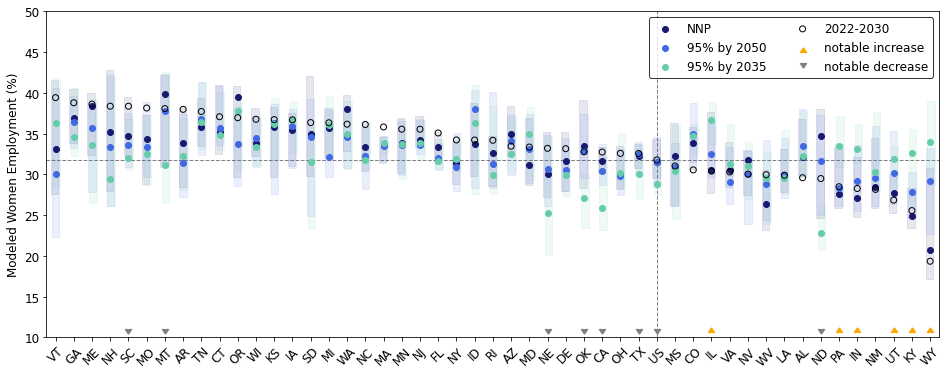

In [59]:
matplotlib.rcParams["font.size"] = 12
plot_order = job_data_all.query("Scenario=='Mid Case'").query("Nuclear=='JEDI'").query("f_case=='mid'").query("analysis=='v6.2jedi_mid'").sort_values("20s")["state"][::-1]
fig, ax = plt.subplots(figsize=(16,6))
fig_labels = plot_order
width = 0.4
color_list = ["midnightblue","royalblue","mediumaquamarine"]
mid_case_list = ['Mid Case','Mid Case 95 by 2050','Mid Case 95 by 2035']
shift_list = [-0.05,0,0.05]

c_count = 0
for this_scen in ["BAU","95% by 2050","95% by 2035"]:
    this_scen_data = job_data_all.query("ems_target==@this_scen")[["state","40s","Scenario","f_case","analysis","Nuclear","ems_target"]]
    this_scen_data = this_scen_data.pivot(index="state",columns=["Scenario","f_case","analysis","Nuclear"],values="40s")
    this_scen_data = this_scen_data.loc[fig_labels]
    this_scen_data["max"] = this_scen_data.max(axis=1)
    this_scen_data["min"] = this_scen_data.min(axis=1)
    this_scen_data["diff"] = this_scen_data["max"] - this_scen_data["min"]
    mid_case_name = mid_case_list[c_count]
    this_scen_data["mid_case"] = job_data_all.set_index("state").query("ems_target==@this_scen").query("Scenario==@mid_case_name").query("analysis=='v6.2jedi_mid'").query("f_case=='mid'")["40s"]
    this_scen_data = this_scen_data.loc[fig_labels]
    ax.bar(np.arange(49)+shift_list[c_count], this_scen_data["diff"], width, bottom=this_scen_data["min"], color = color_list[c_count],
           alpha=0.1,edgecolor=color_list[c_count],zorder=5)
    comparison = this_scen_data[["max","min","mid_case"]]
    comparison = comparison.rename(columns={"max":"max_"+this_scen,"min":"min_"+this_scen,"mid_case":"mid_case_"+this_scen})
    if this_scen == "BAU":
        print_name = "NNP"
        all_comparison = comparison
    else:
        print_name = this_scen
        all_comparison = pd.merge(all_comparison,comparison,left_index=True,right_index=True)
    ax.scatter(fig_labels, this_scen_data["mid_case"], color = color_list[c_count],label=print_name,zorder=10)
    c_count = c_count + 1

start_plot = job_data_all.query("ems_target=='BAU'").query("Scenario=='Mid Case'").query("analysis=='v6.2jedi_mid'").query("f_case=='mid'").set_index("state")
start_plot = start_plot.loc[fig_labels]
ax.scatter(fig_labels, start_plot["20s"], facecolors='none',label="2022-2030",edgecolors='black',linewidth=1,zorder=15)

all_comparison["larger_than_mid"] = all_comparison["mid_case_95% by 2035"] > all_comparison["max_BAU"]
all_comparison["larger_than_50"] = all_comparison["mid_case_95% by 2035"] > all_comparison["max_95% by 2050"]
all_comparison["smaller_than_mid"] = all_comparison["mid_case_95% by 2035"] < all_comparison["min_BAU"]
all_comparison["smaller_than_50"] = all_comparison["mid_case_95% by 2035"] < all_comparison["min_95% by 2050"]
all_comparison["larger"] = all_comparison["larger_than_mid"] + all_comparison["larger_than_50"]
all_comparison["smaller"] = all_comparison["smaller_than_mid"] + all_comparison["smaller_than_50"]

pos_list = all_comparison.index[all_comparison['larger'] == True].tolist()
neg_list = all_comparison.index[all_comparison['smaller'] == True].tolist()
pos_index = [list(plot_order).index(x) for x in pos_list]
neg_index = [list(plot_order).index(x) for x in neg_list]
ax.scatter(pos_index, y=[11.2]*len(pos_index), color = "orange",label="notable increase",marker=6,linewidth=2)
ax.scatter(neg_index, y=[10.5]*len(neg_index), color = "gray",label="notable decrease",marker=7,linewidth=2)

plt.axvline(x=list(plot_order).index("US"),color="grey",linestyle = "--",linewidth=1,zorder=0)
plt.axhline(y=start_plot["20s"][list(plot_order).index("US")],color="grey",linestyle = "--",linewidth=1,zorder=0)
plt.ylabel("Modeled Women Employment (%)")
plt.xlim([-0.5,48.5])
plt.ylim([10,50])
plt.xticks(rotation=45)
ax.legend(loc='upper right',frameon=True,ncol=2,edgecolor="black")#bbox_to_anchor=(1, 1)
plt.savefig('Female_employment_v6.2_all_abs2.png',bbox_inches='tight',dpi=600)